![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

In [169]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

Carguen la base de datos preparada desde la fase 2.

In [18]:
Hospital = pd.read_excel(r'C:\Users\Usuario\proyectos PY\SOY HENRY\Bootcamp\M6\Proyecto Integrador\Propuesta 1\HospitalModelado.xlsx')
HospitalOk = Hospital.copy()

Separen el dataset en X, y (variable objetivo)

In [251]:
X = HospitalOk.drop(columns=['HOSPITALIZACION'])
#X = HospitalOk.drop(columns=['HOSPITALIZACION', 'COMPLICACION INFECCIOSA POST BIOPSIA SI/NO']) # quito columna muy influyente
y = HospitalOk['HOSPITALIZACION']

Separen el dataset en X_train, X_test, y_train y y_test

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [253]:
X_train

,EDAD,DIABETES,HOSPITALIZACION ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,MUESTRAS TOMADAS,CUP,FIEBRE,ITU,...,TIPO_DE_CULTIVO_NO,TIPO_DE_CULTIVO_UROCULTIVO,AGENTE_AISLADO_E.COLI,AGENTE_AISLADO_NO,AGENTE_AISLADO_PSEUDOMONAS AERUGINOSA,"PATRON_DE_RESISTENCIA_ AMPI R, CIPRO R, GENTA R, SULFA M R",PATRON_DE_RESISTENCIA_MULTI SENSIBLE,PATRON_DE_RESISTENCIA_NO,"PATRON_DE_RESISTENCIA_RESISTENTE A AMPI, CIPRO Y GENTA","PATRON_DE_RESISTENCIA_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA"
248,57,0,0,14.50,0,1,12,0,0,0,...,True,False,False,True,False,False,False,True,False,False
88,64,0,0,8.39,0,1,12,0,0,0,...,True,False,False,True,False,False,False,True,False,False
334,70,0,0,10.60,0,1,12,0,0,0,...,True,False,False,True,False,False,False,True,False,False
362,60,0,0,5.97,0,0,12,0,0,0,...,True,False,False,True,False,False,False,True,False,False
33,63,0,0,10.50,0,0,12,0,0,0,...,True,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,53,0,0,4.60,0,1,12,0,0,0,...,True,False,False,True,False,False,False,True,False,False
106,65,0,0,5.97,0,1,20,0,0,0,...,True,False,False,False,False,False,False,True,False,False
270,51,0,0,33.00,0,0,12,0,0,0,...,True,False,False,True,False,False,False,True,False,False
435,69,0,0,20.20,0,1,10,0,0,0,...,True,False,False,True,False,False,False,True,False,False


Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [254]:
profundidad_maxima = 3
modelo_arbol = DecisionTreeClassifier(max_depth=profundidad_maxima)

In [255]:
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [256]:
y_train_pred = modelo_arbol.predict(X_train)
y_test_pred = modelo_arbol.predict(X_test)
y_total_pred = modelo_arbol.predict(X)

In [257]:
# Con 0.2 de test y
# con max_depth de 2, 4, 5 la precisión de train es 0.995 y test 1.0, con 3, 6 o más, la precisión es 1.0 en ambos

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_total = accuracy_score(y, y_total_pred)

print(f"Precisión en conjunto de entrenamiento: {accuracy_train}")
print(f"Precisión en conjunto de prueba: {accuracy_test}")
print(f"Precisión en conjunto total: {accuracy_total}")

Precisión en conjunto de entrenamiento: 0.9955947136563876
Precisión en conjunto de prueba: 1.0
Precisión en conjunto total: 0.9964788732394366


Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización. 

In [258]:
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
confusion_matrix_total = confusion_matrix(y, y_total_pred)


In [259]:
confusion_matrix_total

array([[542,   2],
       [  0,  24]], dtype=int64)

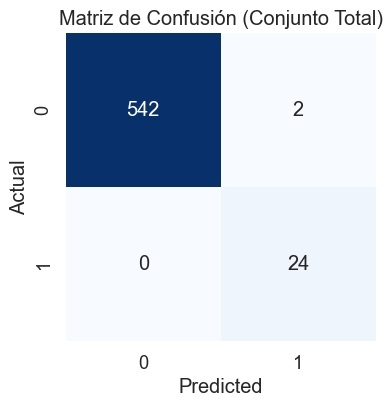

In [273]:
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_total, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión (Conjunto Total)')
plt.show()


In [261]:
verdaderos_positivos = confusion_matrix_total[1, 1]
falsos_positivos = confusion_matrix_total[0, 1]
verdaderos_negativos = confusion_matrix_total[0, 0]
falsos_negativos = confusion_matrix_total[1, 0]
total_predicciones = confusion_matrix_total.sum()

Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

In [262]:
# Exactitud (Accuracy): La exactitud es una métrica común y sencilla que mide la proporción de predicciones
# correctas en relación con el total de predicciones.
# Es especialmente útil cuando las clases están balanceadas en el conjunto de datos. Sin embargo, puede ser engañosa si las clases
# están desbalanceadas, ya que un alto valor de exactitud puede ocultar problemas de clasificación en la clase minoritaria.

print('Exactitud:', accuracy_score(y, y_total_pred))
#Fórmula: (Verdaderos Positivos + Verdaderos Negativos) / Total de Predicciones
print('Exactitud:', (verdaderos_positivos + verdaderos_negativos) / total_predicciones )

Exactitud: 0.9964788732394366
Exactitud: 0.9964788732394366


In [263]:
#Precisión (Precision): La precisión se refiere a la proporción de instancias positivas correctamente identificadas
# entre todas las instancias que el modelo predijo como positivas. Es útil cuando el costo de los falsos positivos
# es alto, es decir, queremos minimizar los casos en los que clasificamos incorrectamente algo como positivo.

print('Precisión:', precision_score(y, y_total_pred))
#Fórmula: Verdaderos Positivos / (Verdaderos Positivos + Falsos Positivos)
print(f'Precisión: {verdaderos_positivos/(verdaderos_positivos + falsos_positivos)}')

print(f'Es decir que aproximadamente de cada 10 positivos predichos, {int(precision_score(y, y_total_pred)*10)} son correctos')

Precisión: 0.9230769230769231
Precisión: 0.9230769230769231
Es decir que aproximadamente de cada 10 positivos predichos, 9 son correctos


In [264]:
#Recuperación (Recall o Sensibilidad): La recuperación mide la proporción de instancias positivas correctamente
# identificadas entre todas las instancias reales que son positivas. Es útil cuando el costo de los falsos negativos
# es alto, es decir, queremos minimizar los casos en los que clasificamos incorrectamente algo como negativo.
print('Sensibilidad/Recuperación/Recall:', recall_score(y, y_total_pred))
#Fórmula: Verdaderos Positivos / (Verdaderos Positivos + Falsos Negativos)
print(f'Sensibilidad: {verdaderos_positivos / (verdaderos_positivos + falsos_negativos)}')

print(f'Es decir que el {recall_score(y, y_total_pred)*100}% de los positivos fueron detectados')

Sensibilidad/Recuperación/Recall: 1.0
Sensibilidad: 1.0
Es decir que el 100.0% de los positivos fueron detectados


Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

In [265]:
# Obtenemos la importancia de las variables
importances = modelo_arbol.feature_importances_

# Obtenemos los nombres de las variables
nombres_variables = X.columns

# Ordenamos las variables por su importancia
indices = np.argsort(importances)[::-1]

In [266]:
modelo_arbol.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06275487, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00872974, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ,        nan,
       0.        , 0.        , 0.        , 0.        ,        nan,
       0.        , 0.        , 0.        , 0.        , 0.        ])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8240\627128560.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


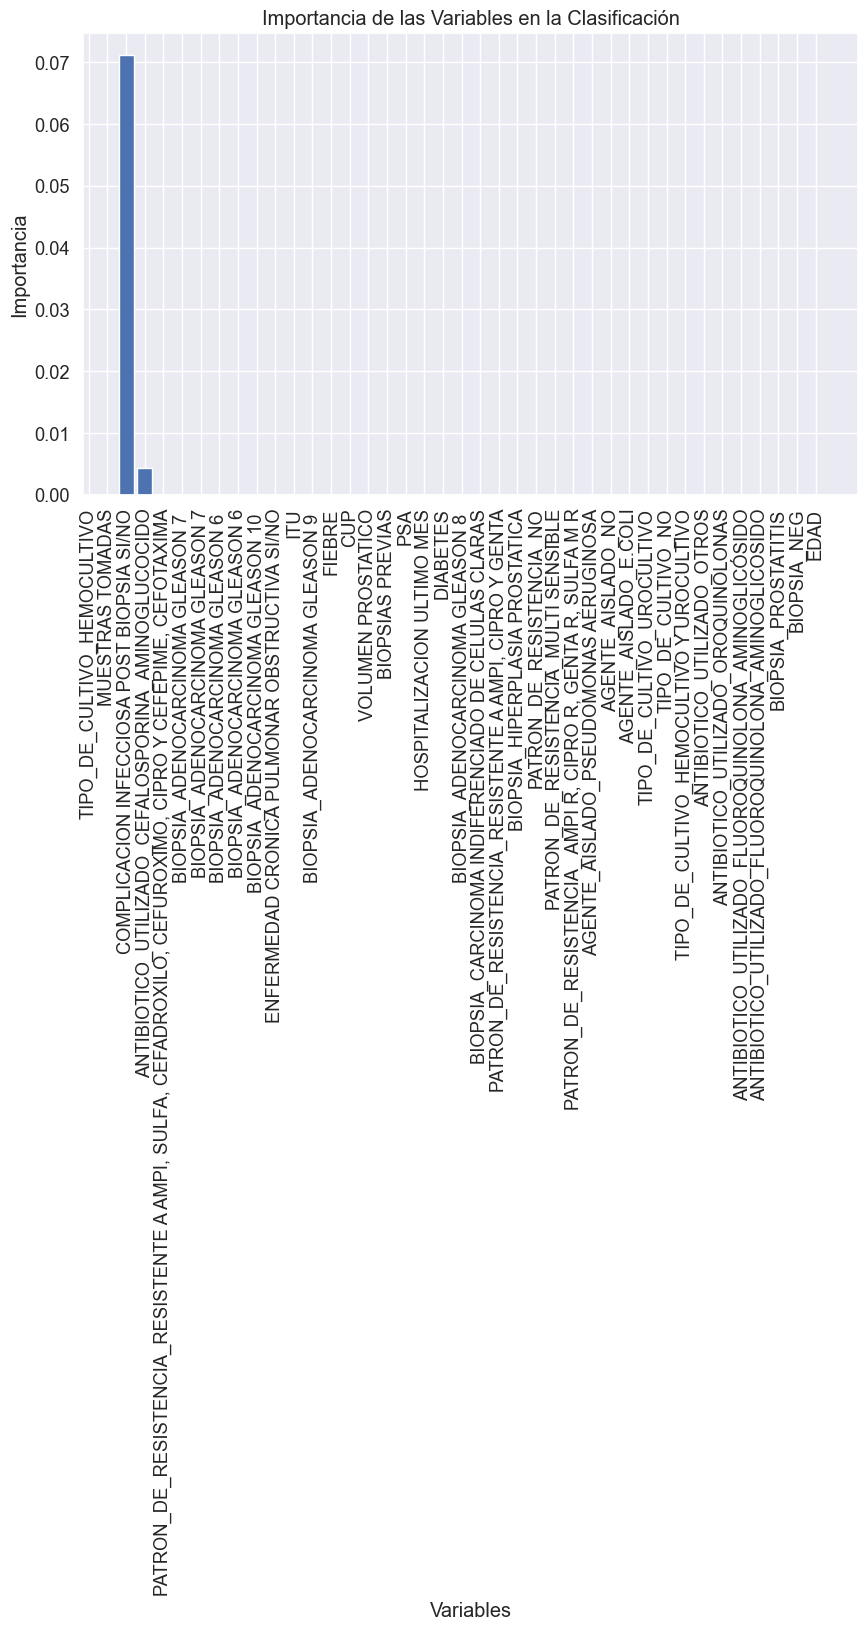

In [241]:
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [nombres_variables[i] for i in indices], rotation=90)
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de las Variables en la Clasificación')
plt.tight_layout()
plt.show()

Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

In [269]:
max_depth_values = [2, 4, 6, 8, 10]

Mejor_Exactitud = 0
Mejor_max_depth = None

for max_depth in max_depth_values:
    # Instanciamos el modelo de árbol de decisión con max_depth de la lista
    modelo_mejor_arbol = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    
    # Entrenamos el modelo
    modelo_mejor_arbol.fit(X_train, y_train)
    
    # Evaluamos el modelo en el conjunto total
    y_total_pred = modelo_mejor_arbol.predict(X)
    Exactitud = accuracy_score(y, y_total_pred)
    
    # Verificamos si el rendimiento es mejor que el anterior
    if Exactitud > Mejor_Exactitud:
        Mejor_Exactitud = Exactitud
        Mejor_max_depth = max_depth

print("Mejor max_depth:", Mejor_max_depth, 'Exactitud:', Mejor_Exactitud)

Mejor max_depth: 4 Exactitud: 1.0


In [271]:
modelo_mejor_arbol = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
modelo_mejor_arbol.fit(X_train, y_train)
y_total_pred = modelo_mejor_arbol.predict(X)
Exactitud = accuracy_score(y, y_total_pred)
print(f"Precisión en conjunto total: {accuracy_total}")
Matriz_Confusion_Total = confusion_matrix(y, y_total_pred)
print(Matriz_Confusion_Total)

Precisión en conjunto total: 0.9964788732394366
[[544   0]
 [  0  24]]


In [272]:
# Obtengo los valores por si quisiera calcular métricas manualmente
verdaderos_positivos = Matriz_Confusion_Total[1, 1]
falsos_positivos = Matriz_Confusion_Total[0, 1]
verdaderos_negativos = Matriz_Confusion_Total[0, 0]
falsos_negativos = Matriz_Confusion_Total[1, 0]
total_predicciones = Matriz_Confusion_Total.sum()

In [274]:
# Exactitud (Accuracy): La exactitud es una métrica común y sencilla que mide la proporción de predicciones
# correctas en relación con el total de predicciones.
# Es especialmente útil cuando las clases están balanceadas en el conjunto de datos. Sin embargo, puede ser engañosa si las clases
# están desbalanceadas, ya que un alto valor de exactitud puede ocultar problemas de clasificación en la clase minoritaria.
print('Exactitud:', accuracy_score(y, y_total_pred))

#Precisión (Precision): La precisión se refiere a la proporción de instancias positivas correctamente identificadas
# entre todas las instancias que el modelo predijo como positivas. Es útil cuando el costo de los falsos positivos
# es alto, es decir, queremos minimizar los casos en los que clasificamos incorrectamente algo como positivo.
print('Precisión:', precision_score(y, y_total_pred))

#Recuperación (Recall o Sensibilidad): La recuperación mide la proporción de instancias positivas correctamente
# identificadas entre todas las instancias reales que son positivas. Es útil cuando el costo de los falsos negativos
# es alto, es decir, queremos minimizar los casos en los que clasificamos incorrectamente algo como negativo.
print('Sensibilidad/Recuperación/Recall:', recall_score(y, y_total_pred))

Exactitud: 1.0
Precisión: 1.0
Sensibilidad/Recuperación/Recall: 1.0


In [275]:
# Obtenemos la importancia de las variables
importances = modelo_mejor_arbol.feature_importances_

# Obtenemos los nombres de las variables
nombres_variables = X.columns

# Ordenamos las variables por su importancia
indices = np.argsort(importances)[::-1]

In [276]:
modelo_mejor_arbol.feature_importances_

array([       nan, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ,        nan,
       0.        , 0.06275487, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ,        nan,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ,        nan, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ,        nan])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8240\627128560.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


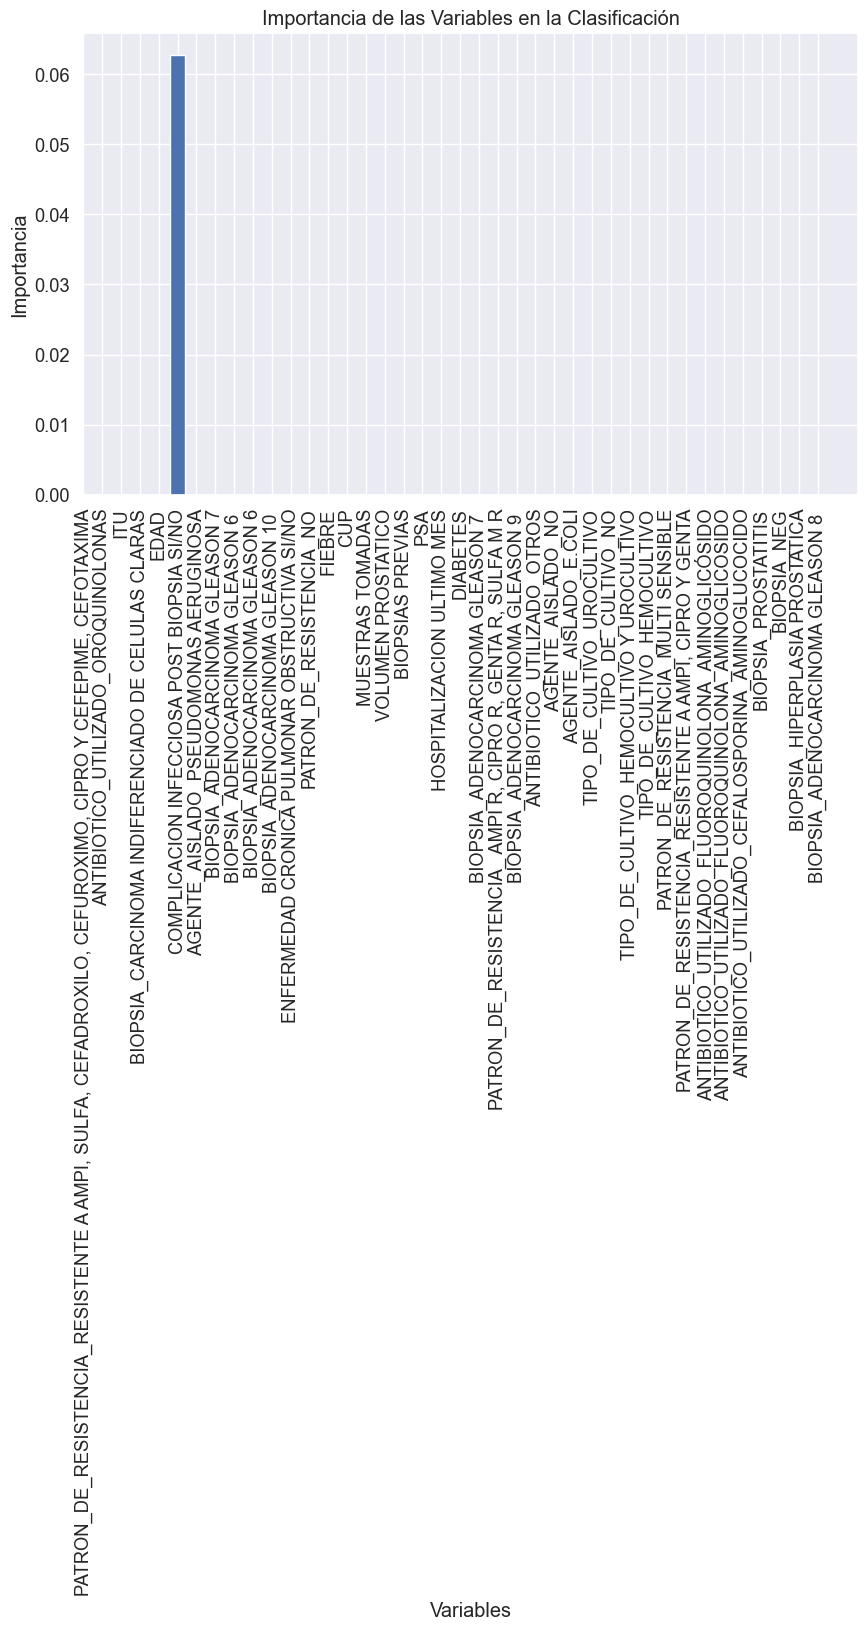

In [277]:
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [nombres_variables[i] for i in indices], rotation=90)
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de las Variables en la Clasificación')
plt.tight_layout()
plt.show()

Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

Encuentre el valor óptimo para k

Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

R/